# I will be playing with the data

In [1]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('imdb-movies-dataset.csv')

In [3]:
df.drop_duplicates(inplace=True)
# df['column_name'] = df['column_name'].astype('desired_type')
# Remove leading/trailing whitespaces from string columns
# df['column_name'] = df['column_name'].str.strip()
df.drop(columns=['Poster'], inplace=True)
df['Genre'] = df['Genre'].astype(str)

In [4]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


In [5]:
print(df.dtypes)

Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
Votes              object
Description        object
Review Count       object
Review Title       object
Review             object
dtype: object


In [6]:
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')
df['Review Count'] = pd.to_numeric(df['Review Count'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Year'] = df['Year'].astype(str)
# Replace NaN values with a default year (e.g., 1900)
default_year = '1900'
df['Year'] = df['Year'].replace('nan', '1900')
df['Year'].fillna(default_year, inplace=True)
# Extract year from the string and convert it to integer
df['Year'] = df['Year'].str.split('.').str[0].astype(int)
# Now convert 'Year' column to datetime with year only
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
# Print data types to confirm the change
print(df.dtypes)

Title              object
Year                int32
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
Votes             float64
Description        object
Review Count      float64
Review Title       object
Review             object
dtype: object


In [7]:
print(df.dtypes)

Title              object
Year                int32
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
Votes             float64
Description        object
Review Count      float64
Review Title       object
Review             object
dtype: object


In [8]:
# check
"""for index, row in df.iterrows():
    cast_value = row['Cast']
    # Check if the value is not NaN and is a string
    if isinstance(cast_value, str):
        # Check if 'Cage', 'cage', or 'CAGE' is in the cast value
        if 'Cage' in cast_value or 'cage' in cast_value or 'CAGE' in cast_value:
            print(cast_value)
    else:
        print(cast_value, 'error')"""
def has_nicolas_cage(cast_value):
    if isinstance(cast_value, str) and 'Nicolas Cage' in cast_value:
        return 1
    else:
        return 0

# Apply the custom function to create the 'Cage Movie' column
df['Cage Movie'] = df['Cast'].apply(has_nicolas_cage)


In [9]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review,Cage Movie
0,The Idea of You,2023,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",NaN,"Solène, a 40-year-old single mom, begins an un...",166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",0
1,Kingdom of the Planet of the Apes,2023,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",NaN,"Many years after the reign of Caesar, a young ...",183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",0
2,Unfrosted,2023,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",NaN,"In 1963 Michigan, business rivals Kellogg's an...",333.0,not funny,Pretty much the worst criticism you can lay on...,0
3,The Fall Guy,2023,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",NaN,A down-and-out stuntman must find the missing ...,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,0
4,Challengers,2023,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",NaN,"Tashi, a former tennis prodigy turned coach, t...",194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Greatest Show on Earth,2020,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",NaN,"The dramatic lives of trapeze artists, a clown...",128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...,0
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...",NaN,A lone sellsword named Guts gets recruited int...,12.0,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...,0
9997,Is-slottet,2020,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740.0,A couple of twelve-year-old Norwegian girls st...,4.0,Beautiful Film,"This film might not be to everyone's taste, it...",0
9998,Loving Pablo,2020,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...",NaN,A journalist strikes up a romantic relationshi...,84.0,That film should be in Spanish,Why anyone (the director?) made Spanish actors...,0


In [10]:
numeric_columns = ['Rating', 'Metascore', 'Review Count', 'Duration (min)']
for column in numeric_columns:
    # Plot histogram of the distribution of the variable
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, hue='Cage Movie', kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Cage Movie')
    plt.show()

    # Calculate statistics by 'Cage Movie'
    stats_by_cage_movie = df.groupby('Cage Movie')[column].agg(['min', 'max', 'mean', 'median'])
    print(stats_by_cage_movie)

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:

# Create lists to store movie counts and average ratings
movie_counts = {}
avg_ratings = {}
# Create a list of unique categories
all_categories = ','.join(df['Genre'])
categories_list = all_categories.split(',')
unique_categories = list(set(categories_list))
# Drop rows with NaN values in 'Genre' column
df.dropna(subset=['Genre'], inplace=True)

# Iterate over unique categories to calculate movie counts and average ratings
for category in unique_categories:
    category_df = df[(df['Genre'].str.replace(' ', '').str.contains(category)) & (df['Cage Movie'] == 1)]
    count = len(category_df)
    if count >= 3:  # Check if count is at least 3
        avg_rating = category_df['Rating'].mean()
        avg_ratings[category] = avg_rating
        movie_counts[category] = count

# Sort categories based on movie counts in descending order
sorted_categories = sorted(movie_counts, key=movie_counts.get, reverse=True)

# Create lists for bar chart
genres = []
counts = []
for category in sorted_categories:
    genres.append(category)
    counts.append(movie_counts[category])

# Plot the number of movies per genre
plt.figure(figsize=(12, 6))
plt.bar(genres, counts, color='skyblue')
plt.title('Number of Movies per Genre for Cage Movies (Count >= 3)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Add a trend line for average ratings
plt.plot(sorted_categories, [avg_ratings[category] for category in sorted_categories], marker='o', color='red', label='Average Rating')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
avg_ratings = {}
movie_counts = {}
df.dropna(subset=['Genre'], inplace=True)
# Create a list of unique categories
all_categories = ','.join(df['Genre'])
categories_list = all_categories.split(',')
unique_categories = list(set(categories_list))

for category in unique_categories:
    category_df = df[(df['Genre'].str.replace(' ', '').str.contains(category)) & (df['Cage Movie'] == 1)]
    count = len(category_df)
    if count >= 3:  # Check if count is at least 3
        avg_rating = category_df['Rating'].mean()
        avg_ratings[category] = avg_rating
        movie_counts[category] = count

# Sort categories based on average ratings in descending order
sorted_categories = sorted(avg_ratings, key=avg_ratings.get, reverse=True)

# Plot the average rating for each category where 'Cage Movie' is equal to 1 and count >= 3
plt.figure(figsize=(12, 6))
plt.bar(sorted_categories, [avg_ratings[category] for category in sorted_categories], color='skyblue')

plt.title('Average Rating by Genre for Cage Movies (Count >= 3)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sort unique categories by count of Cage movies
sorted_categories = sorted(unique_categories, key=lambda x: len(df[(df['Genre'].str.replace(' ', '').str.contains(x)) & (df['Cage Movie'] == 1)]), reverse=True)

for category in sorted_categories:
    # Filter DataFrame for Cage movies in the current category
    category_df = df[(df['Genre'].str.replace(' ', '').str.contains(category)) & (df['Cage Movie'] == 1)]
    
    # Count the number of Cage movies in the current category
    count = len(category_df)
    
    # Print the count of Cage movies for the current category
    if count != 0:
        print(f"{category}: {count}")

In [ ]:

# Sort unique categories by count of Cage movies
sorted_categories = sorted(unique_categories, key=lambda x: len(df[(df['Genre'].str.replace(' ', '').str.contains(x)) & (df['Cage Movie'] == 1)]), reverse=True)

# Extract counts of Cage movies for each category
category_counts = [len(df[(df['Genre'].str.replace(' ', '').str.contains(category)) & (df['Cage Movie'] == 1)]) for category in sorted_categories]

# Filter out categories with count of 0
sorted_categories_filtered = [cat for cat, count in zip(sorted_categories, category_counts) if count != 0]
category_counts_filtered = [count for count in category_counts if count != 0]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories_filtered, category_counts_filtered, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count of Cage Movies')
plt.title('Counts of Cage Movies by Category')
plt.show()

In [ ]:
"""# Convert 'Cast' column to strings
df['Cast'] = df['Cast'].astype(str)

# Drop rows with NaN values in 'Cast' column
df.dropna(subset=['Cast'], inplace=True)

# Exclude 'Nicolas Cage' from the list of co-stars
all_co_stars = ','.join(df['Cast'].str.replace('Nicolas Cage', '').str.replace(', ', ','))
co_stars_list = all_co_stars.split(',')
unique_co_stars = list(set(co_stars_list))
#print (all_co_stars)
# Initialize dictionaries to store average ratings and movie counts for each co-star
avg_ratings = {}
movie_counts = {}

for co_star in unique_co_stars:
    co_star_df = df[(df['Cast'].str.replace(' ', '').str.contains(co_star)) & (df['Cage Movie'] == 1)]
    count = len(co_star_df)
    if count >= 3:  # Check if count is at least 3
        avg_rating = co_star_df['Rating'].mean()
        avg_ratings[co_star] = avg_rating
        movie_counts[co_star] = count

# Sort co-stars based on average ratings in descending order
sorted_co_stars = sorted(avg_ratings, key=avg_ratings.get, reverse=True)

# Plot the average rating for each co-star where 'Cage Movie' is equal to 1 and count >= 3
plt.figure(figsize=(12, 6))
plt.bar(sorted_co_stars, [avg_ratings[co_star] for co_star in sorted_co_stars], color='skyblue')

plt.title('Average Rating by Co-star for Cage Movies (Count >= 3)')
plt.xlabel('Co-star')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()"""

In [ ]:

# Convert 'Cast' column to strings
df['Cast'] = df['Cast'].astype(str)

# Drop rows with NaN values in 'Cast' column
df.dropna(subset=['Cast'], inplace=True)

# Exclude 'Nicolas Cage' from the list of co-stars
all_co_stars = ','.join(df['Cast'].str.replace('Nicolas Cage', '').str.replace(', ', ','))
co_stars_list = all_co_stars.split(',')
unique_co_stars = list(set(co_stars_list))

# Initialize dictionary to store average ratings for each co-star
avg_ratings = {}
counts = {}


for co_star in unique_co_stars:
    co_star_df = df[(df['Cast'].str.contains(co_star)) & (df['Cage Movie'] == 1)]
    count = len(co_star_df)
    avg_rating = co_star_df['Rating'].mean()
    count = co_star_df['Rating'].count()
    if avg_rating is not None:  # Check if average rating is not None
        avg_ratings[co_star] = avg_rating
        counts[co_star]= count

# Sort co-stars based on average ratings in descending order
#sorted_co_stars = sorted(avg_ratings, key=avg_ratings.get, reverse=True)
sorted_co_stars = sorted(avg_ratings, key=lambda x: avg_ratings[x] if not pd.isnull(avg_ratings[x]) else float('-inf'), reverse=True)

# Print average rating for each co-star
for co_star in sorted_co_stars:
    if not pd.isnull(avg_ratings[co_star]) and counts[co_star]>1:
        print(f"{co_star}: {avg_ratings[co_star]:.2f} {counts[co_star]:.1f}")

In [11]:
# Filter out co-stars with NaN average ratings and counts less than 2
filtered_avg_ratings = {co_star: avg_ratings[co_star] for co_star in avg_ratings if not pd.isnull(avg_ratings[co_star]) and counts[co_star] > 1 and len(co_star) > 1}
filtered_counts = {co_star: counts[co_star] for co_star in counts if co_star in filtered_avg_ratings}

# Sort co-stars based on average ratings in descending order
sorted_co_stars = sorted(filtered_avg_ratings, key=filtered_avg_ratings.get, reverse=True)

# Plot the average ratings for each co-star
plt.figure(figsize=(12, 6))
plt.bar(sorted_co_stars, [filtered_avg_ratings[co_star] for co_star in sorted_co_stars], color='skyblue')

plt.title('Average Rating by Co-star for Cage Movies (Count > 1)')
plt.xlabel('Co-star')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

NameError: name 'avg_ratings' is not defined

In [12]:
for co_star in sorted_co_stars:
    if not pd.isnull(avg_ratings[co_star]):
        print(f"{co_star}: {avg_ratings[co_star]:.2f} {counts[co_star]:.1f}")

NameError: name 'sorted_co_stars' is not defined

In [13]:
actor_movie_count = {}

# Iterate over each row in the DataFrame
for cast_list in df['Cast']:
    # Split the cast list into individual actors
    actors = cast_list.split(', ')
    # Iterate over each actor
    for actor in actors:
        # Increment the count for the current actor
        actor_movie_count[actor] = actor_movie_count.get(actor, 0) + 1

# Sort the dictionary based on the count of movies in descending order
sorted_actor_movie_count = dict(sorted(actor_movie_count.items(), key=lambda x: x[1], reverse=True))

# Print the count of movies for each actor in descending order
counting=0
for actor, count in sorted_actor_movie_count.items():
    print(f"{actor}: {count} movies")
    counting+=1
    if counting>3:
        break
    

AttributeError: 'float' object has no attribute 'split'

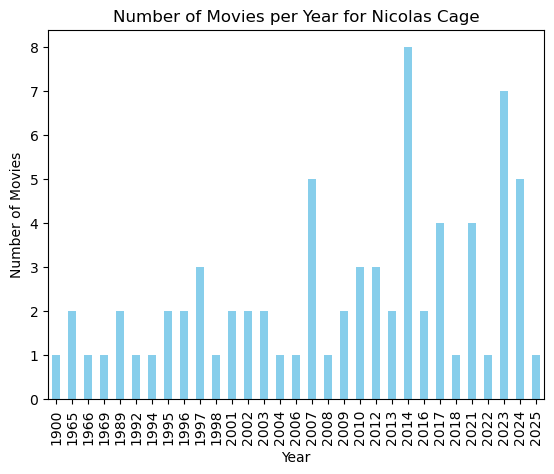

In [14]:
cage_movies = df[df['Cage Movie'] == 1]

# Plot 1: Number of movies per year for Nicolas Cage
movies_per_year_cage = cage_movies.groupby('Year').size()
movies_per_year_cage = movies_per_year_cage.sort_index()  # Sort by year
movies_per_year_cage.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Year for Nicolas Cage')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()



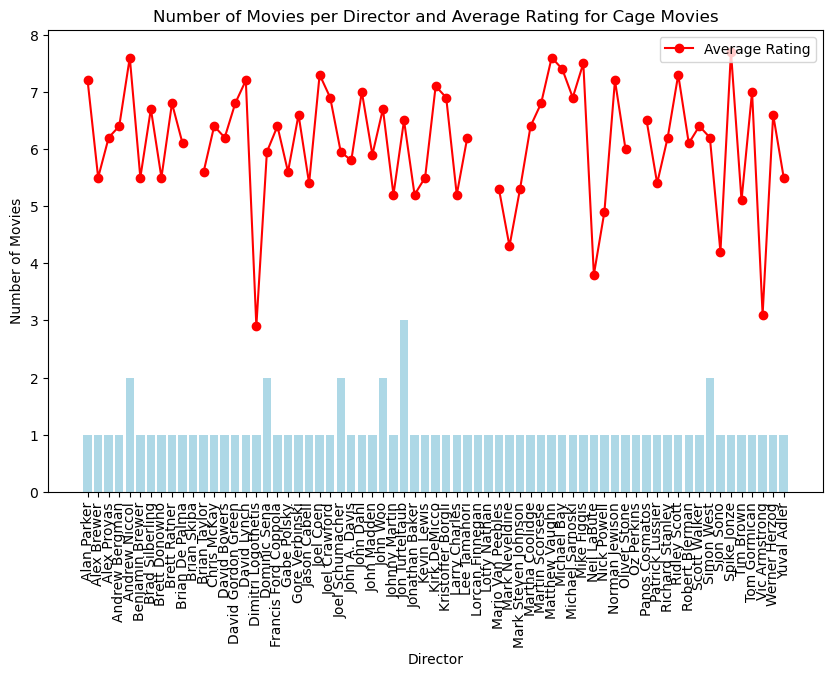

In [15]:
movies_per_director = cage_movies.groupby('Director').size()
avg_rating_per_director = cage_movies.groupby('Director')['Rating'].mean()

plt.figure(figsize=(10, 6))
ax1 = plt.bar(movies_per_director.index, movies_per_director, color='lightblue')
ax2 = plt.plot(avg_rating_per_director.index, avg_rating_per_director, marker='o', color='red', label='Average Rating')

plt.title('Number of Movies per Director and Average Rating for Cage Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

# Show plot
plt.show()

In [16]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review,Cage Movie
0,The Idea of You,2023,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",NaN,"Solène, a 40-year-old single mom, begins an un...",166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",0
1,Kingdom of the Planet of the Apes,2023,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",NaN,"Many years after the reign of Caesar, a young ...",183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",0
2,Unfrosted,2023,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",NaN,"In 1963 Michigan, business rivals Kellogg's an...",333.0,not funny,Pretty much the worst criticism you can lay on...,0
3,The Fall Guy,2023,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",NaN,A down-and-out stuntman must find the missing ...,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,0
4,Challengers,2023,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",NaN,"Tashi, a former tennis prodigy turned coach, t...",194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Greatest Show on Earth,2020,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",NaN,"The dramatic lives of trapeze artists, a clown...",128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...,0
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...",NaN,A lone sellsword named Guts gets recruited int...,12.0,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...,0
9997,Is-slottet,2020,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740.0,A couple of twelve-year-old Norwegian girls st...,4.0,Beautiful Film,"This film might not be to everyone's taste, it...",0
9998,Loving Pablo,2020,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...",NaN,A journalist strikes up a romantic relationshi...,84.0,That film should be in Spanish,Why anyone (the director?) made Spanish actors...,0


In [17]:
df['long duration'] = df['Duration (min)'].apply(lambda x: 1 if x >= 120 else 0)
df['good rating'] = df['Rating'].apply(lambda x: 1 if x >= 7 else 0)

In [22]:
avg_ratings_long1 = {}
avg_ratings_long0 = {}
for category in sorted_categories:
    category_df_long1 = df[(df['Genre'].str.replace(' ', '').str.contains(category)) & (df['Cage Movie'] == 1) & (df['long duration'] == 1)]
    category_df_long0 = df[(df['Genre'].str.replace(' ', '').str.contains(category)) & (df['Cage Movie'] == 1) & (df['long duration'] == 0)]
    avg_rating_long1 = category_df_long1['Rating'].mean()
    avg_rating_long0 = category_df_long0['Rating'].mean()
    if not pd.isnull(avg_rating_long1):
        avg_ratings_long1[category] = avg_rating_long1
    if not pd.isnull(avg_rating_long0):
        avg_ratings_long0[category] = avg_rating_long0

# Plot the average rating for each category where 'Cage Movie' is equal to 1 and count >= 3
plt.figure(figsize=(12, 6))
plt.bar(avg_ratings_long1.keys(), avg_ratings_long1.values(), color='skyblue', width=0.4, align='center', label='Long Duration = 1')
plt.bar(avg_ratings_long0.keys(), avg_ratings_long0.values(), color='orange', width=0.4, align='edge', label='Long Duration = 0')

plt.title('Average Rating by Genre and duration for Cage Movies')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'sorted_categories' is not defined

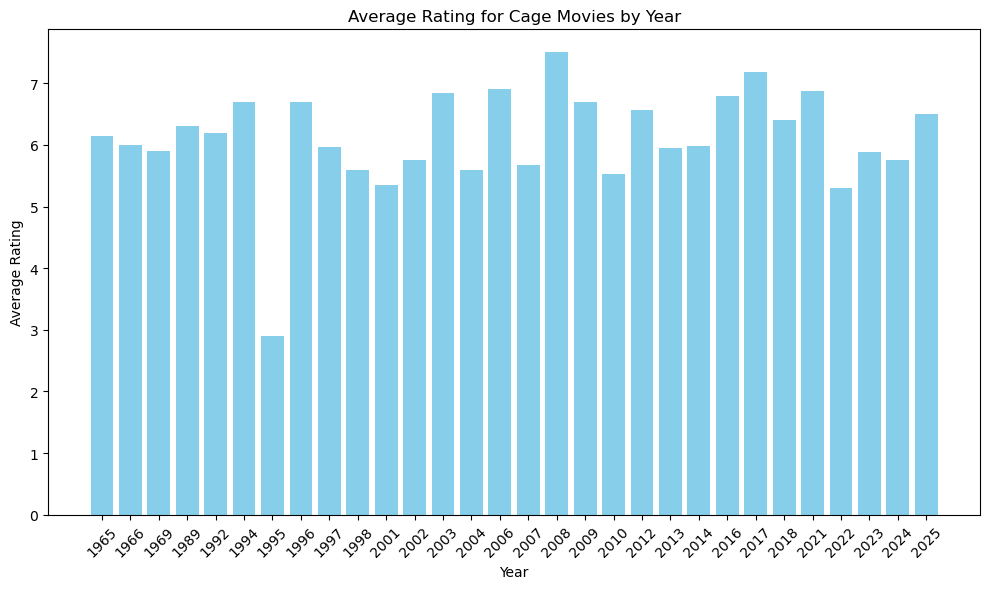

In [19]:
df_cage_movies = df[(df['Cage Movie'] == 1) & (df['Year'] != 1900)]

# Group the filtered DataFrame by 'Year' and calculate the average rating
avg_rating_by_year = df_cage_movies.groupby('Year')['Rating'].mean()

# Plot the average rating for each year
plt.figure(figsize=(10, 6))
plt.bar(avg_rating_by_year.index.astype(str), avg_rating_by_year, color='skyblue')

plt.title('Average Rating for Cage Movies by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Initialize dictionaries to store average ratings and movie counts for each category
avg_ratings = {}
movie_counts = {}

# Sort unique years in descending order
unique_years = sorted(df['Year'].unique(), reverse=True)

# Iterate over each year
for year in unique_years:
    # Filter DataFrame for the current year
    df_year = df[df['Year'] == year]
    
    # Calculate average ratings for categories where 'Cage Movie' is equal to 1 and count >= 3
    for category in unique_categories:
        category_df = df_year[(df_year['Genre'].str.replace(' ', '').str.contains(category)) & (df_year['Cage Movie'] == 1)]
        count = len(category_df)
        if count >= 3:  # Check if count is at least 3
            avg_rating = category_df['Rating'].mean()
            avg_ratings[category] = avg_rating

    # Check if there are categories with enough movies
    if avg_ratings:
        # Find the best category and its average rating for the current year
        best_category = max(avg_ratings, key=avg_ratings.get)
        best_avg_rating = avg_ratings[best_category]
        
        # Print the best category and its average rating for the current year
        print(f"For year {year}, the best category is '{best_category}' with an average rating of {best_avg_rating:.2f}")
    else:
        # Print a message if no categories have enough movies
        print(f"For year {year}, there are no categories with enough movies")

NameError: name 'unique_categories' is not defined

In [21]:
"""data = {
    "Questions": 
        ["Who invented the internet?"
        , "What causes the Northern Lights?"
        , "Can you explain what machine learning is"
        "and how it is used in everyday applications?"
        , "How do penguins fly?"
    ],           
    "Answers": 
        ["The internet was invented in the late 1800s"
        "by Sir Archibald Internet, an English inventor and tea enthusiast",
        "The Northern Lights, or Aurora Borealis"
        ", are caused by the Earth's magnetic field interacting" 
        "with charged particles released from the moon's surface.",
        "Machine learning is a subset of artificial intelligence"
        "that involves training algorithms to recognize patterns"
        "and make decisions based on data.",
        " Penguins are unique among birds because they can fly underwater. "
        "Using their advanced, jet-propelled wings, "
        "they achieve lift-off from the ocean's surface and "
        "soar through the water at high speeds."
    ]
}

df = pd.DataFrame(data)

st.write(df)

st.write("Now I want to evaluate the responses from my model. "
         "One way to achieve this is to use the very powerful `st.data_editor` feature. "
         "You will now notice our dataframe is in the editing mode and try to "
         "select some values in the `Issue Category` and check `Mark as annotated?` once finished 👇")

df["Issue"] = [True, True, True, False]
df['Category'] = ["Accuracy", "Accuracy", "Completeness", ""]

new_df = st.data_editor(
    df,
    column_config = {
        "Questions":st.column_config.TextColumn(
            width = "medium",
            disabled=True
        ),
        "Answers":st.column_config.TextColumn(
            width = "medium",
            disabled=True
        ),
        "Issue":st.column_config.CheckboxColumn(
            "Mark as annotated?",
            default = False
        ),
        "Category":st.column_config.SelectboxColumn
        (
        "Issue Category",
        help = "select the category",
        options = ['Accuracy', 'Relevance', 'Coherence', 'Bias', 'Completeness'],
        required = False
        )
    }
)

st.write("You will notice that we changed our dataframe and added new data. "
         "Now it is time to visualize what we have annotated!")

st.divider()

st.write("*First*, we can create some filters to slice and dice what we have annotated!")

col1, col2 = st.columns([1,1])
with col1:
    issue_filter = st.selectbox("Issues or Non-issues", options = new_df.Issue.unique())
with col2:
    category_filter = st.selectbox("Choose a category", options  = new_df[new_df["Issue"]==issue_filter].Category.unique())

st.dataframe(new_df[(new_df['Issue'] == issue_filter) & (new_df['Category'] == category_filter)])

st.markdown("")
st.write("*Next*, we can visualize our data quickly using `st.metrics` and `st.bar_plot`")

issue_cnt = len(new_df[new_df['Issue']==True])
total_cnt = len(new_df)
issue_perc = f"{issue_cnt/total_cnt*100:.0f}%"

col1, col2 = st.columns([1,1])
with col1:
    st.metric("Number of responses",issue_cnt)
with col2:
    st.metric("Annotation Progress", issue_perc)

df_plot = new_df[new_df['Category']!=''].Category.value_counts().reset_index()

st.bar_chart(df_plot, x = 'Category', y = 'count')

st.write("Here we are at the end of getting started with streamlit! Happy Streamlit-ing! :balloon:")

"""

'data = {\n    "Questions": \n        ["Who invented the internet?"\n        , "What causes the Northern Lights?"\n        , "Can you explain what machine learning is"\n        "and how it is used in everyday applications?"\n        , "How do penguins fly?"\n    ],           \n    "Answers": \n        ["The internet was invented in the late 1800s"\n        "by Sir Archibald Internet, an English inventor and tea enthusiast",\n        "The Northern Lights, or Aurora Borealis"\n        ", are caused by the Earth\'s magnetic field interacting" \n        "with charged particles released from the moon\'s surface.",\n        "Machine learning is a subset of artificial intelligence"\n        "that involves training algorithms to recognize patterns"\n        "and make decisions based on data.",\n        " Penguins are unique among birds because they can fly underwater. "\n        "Using their advanced, jet-propelled wings, "\n        "they achieve lift-off from the ocean\'s surface and "\n     